In [91]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV, cross_val_score, cross_val_predict, LeaveOneOut, KFold
from sklearn.svm import SVC
from hypopt import GridSearch

from sklearn.preprocessing import OneHotEncoder

from umap import UMAP
import skdim
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

from sklearn.neighbors import NearestNeighbors

from sklearn.decomposition import PCA, FastICA
# import psyplot.project as psy
from sklearn.svm import SVR

from mpl_toolkits.axes_grid1 import make_axes_locatable


In [74]:
model_path = "/neurospin/dico/data/deep_folding/current/models/Champollion_V0/ScCal-SLi_left/09-28-12_0"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
ukb_emb_realigned_file = f"{model_path}/ukb_realigned_random_embeddings/full_embeddings.csv"

In [6]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-44.764812,-7.561168,-27.046082,-33.584930,-13.237930,-10.817898,0.581217,28.097376,6.987557,-17.722223,...,-19.355621,22.879978,60.176323,34.403290,-50.994858,-61.453964,67.128075,-30.144411,-11.567401,-34.812770
sub-1000458,18.033236,-19.331535,4.588765,17.981405,20.067762,15.785610,-20.103287,27.118490,18.161518,15.049867,...,9.665567,13.187021,49.730540,-5.843871,34.320240,31.848700,25.309462,5.590658,1.110065,8.127332
sub-1000575,-9.152472,7.461522,-34.986843,56.177795,18.481247,28.050117,-22.019306,-20.583708,5.513316,20.022285,...,-5.060265,10.865500,38.559406,-16.595951,6.662376,-35.713223,20.241130,2.440343,-9.916403,5.771592
sub-1000606,-26.186844,-38.599330,-14.307706,35.718296,-26.845760,3.516212,24.741770,3.041305,-18.980959,4.707555,...,20.363668,19.099170,34.822926,-0.493881,-13.821614,21.030193,2.300773,-7.729381,-1.205893,23.747902
sub-1000963,-23.809263,-25.897652,5.828577,20.800860,2.034690,51.072227,6.297543,-33.402027,20.131933,-5.758612,...,2.499297,-20.839810,-1.513577,-3.883939,18.674840,20.531118,18.756912,-2.353150,5.136505,-8.554947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-41.317240,-40.447784,-30.041615,-16.751925,-3.510754,32.433940,42.603153,-14.556619,38.658398,8.856137,...,7.294170,17.858904,14.641837,39.841465,-11.705192,-31.066736,-3.142765,0.310284,-3.552202,-20.834000
sub-6023808,-2.692974,-25.719662,-1.916609,10.499981,39.105064,20.467455,4.865832,-7.040365,13.695807,24.290066,...,-16.505777,17.831127,30.909016,0.408267,24.229828,-49.831936,66.218410,-0.754347,-19.414412,-29.457642
sub-6023847,-48.122066,-44.838470,29.136040,-12.767525,7.187038,-4.979211,17.509117,-7.293974,-2.724546,-24.633583,...,-17.365868,4.597022,-9.218680,1.169816,-12.880522,-35.096134,71.191170,-12.772809,-17.953390,-10.624347


In [76]:
ukb_emb_realigned = pd.read_csv(ukb_emb_realigned_file, index_col=0)
ukb_emb_realigned

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000458,18.033232,-19.331535,4.588764,17.981401,20.067759,15.785607,-20.103287,27.118490,18.161516,15.049869,...,9.665570,13.187024,49.730540,-5.843870,34.320236,31.848700,25.309462,5.590658,1.110068,8.127332
sub-1000963,-18.321423,-33.301410,15.633445,25.578661,0.867406,49.263893,4.575396,-34.243220,18.070814,-4.107327,...,1.120028,-22.544918,-4.828158,-5.255249,26.620600,27.305666,21.156086,4.368187,7.563473,-4.905074
sub-1001428,-37.384020,44.891884,-4.552394,15.892329,10.883994,5.528879,2.916321,-35.062637,12.777748,-20.669441,...,-2.010848,-33.824356,50.466297,19.263050,18.137947,-31.194616,-1.768052,-17.569254,-1.440254,-2.336186
sub-1001444,-33.816235,-52.045880,-10.490544,11.193795,-22.741430,22.150023,25.278038,-25.836970,30.453730,24.356194,...,-1.741140,-0.616485,5.027645,3.983287,-8.096211,-44.480515,40.792076,-17.896383,0.543999,-14.845968
sub-1002188,-34.334606,-4.025390,-3.115116,7.914770,-4.886020,-20.654417,0.324120,8.083896,41.184315,3.217996,...,-8.071263,-3.509234,52.904736,30.498106,1.854792,-73.209390,26.195404,-21.700367,-2.384418,-20.383003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6022058,-37.936363,-64.664880,27.264961,-12.605188,32.154957,60.928760,33.721313,-47.633236,23.987112,-20.104850,...,6.922701,-10.891495,-34.674810,26.000630,-45.840280,-27.492584,44.638096,55.203940,18.607235,-18.519426
sub-6022449,-30.364890,-48.942547,-14.410030,9.424635,0.959984,-4.630857,36.038452,8.540176,0.140897,21.482477,...,-11.284061,43.702650,21.750595,13.536384,-26.492630,-25.025625,58.491344,-9.071732,-14.196789,-0.953768
sub-6023808,-2.692976,-25.719654,-1.916608,10.499979,39.105060,20.467459,4.865834,-7.040366,13.695805,24.290060,...,-16.505777,17.831127,30.909020,0.408271,24.229822,-49.831920,66.218410,-0.754347,-19.414410,-29.457640


# UKBioBank

In [7]:
# norm = ukb_emb.apply(np.linalg.norm, axis=1)
# ukb_emb = ukb_emb.div(norm, axis=0)

In [8]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-44.764812,-7.561168,-27.046082,-33.584930,-13.237930,-10.817898,0.581217,28.097376,6.987557,-17.722223,...,-19.355621,22.879978,60.176323,34.403290,-50.994858,-61.453964,67.128075,-30.144411,-11.567401,-34.812770
sub-1000458,18.033236,-19.331535,4.588765,17.981405,20.067762,15.785610,-20.103287,27.118490,18.161518,15.049867,...,9.665567,13.187021,49.730540,-5.843871,34.320240,31.848700,25.309462,5.590658,1.110065,8.127332
sub-1000575,-9.152472,7.461522,-34.986843,56.177795,18.481247,28.050117,-22.019306,-20.583708,5.513316,20.022285,...,-5.060265,10.865500,38.559406,-16.595951,6.662376,-35.713223,20.241130,2.440343,-9.916403,5.771592
sub-1000606,-26.186844,-38.599330,-14.307706,35.718296,-26.845760,3.516212,24.741770,3.041305,-18.980959,4.707555,...,20.363668,19.099170,34.822926,-0.493881,-13.821614,21.030193,2.300773,-7.729381,-1.205893,23.747902
sub-1000963,-23.809263,-25.897652,5.828577,20.800860,2.034690,51.072227,6.297543,-33.402027,20.131933,-5.758612,...,2.499297,-20.839810,-1.513577,-3.883939,18.674840,20.531118,18.756912,-2.353150,5.136505,-8.554947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,-41.317240,-40.447784,-30.041615,-16.751925,-3.510754,32.433940,42.603153,-14.556619,38.658398,8.856137,...,7.294170,17.858904,14.641837,39.841465,-11.705192,-31.066736,-3.142765,0.310284,-3.552202,-20.834000
sub-6023808,-2.692974,-25.719662,-1.916609,10.499981,39.105064,20.467455,4.865832,-7.040365,13.695807,24.290066,...,-16.505777,17.831127,30.909016,0.408267,24.229828,-49.831936,66.218410,-0.754347,-19.414412,-29.457642
sub-6023847,-48.122066,-44.838470,29.136040,-12.767525,7.187038,-4.979211,17.509117,-7.293974,-2.724546,-24.633583,...,-17.365868,4.597022,-9.218680,1.169816,-12.880522,-35.096134,71.191170,-12.772809,-17.953390,-10.624347


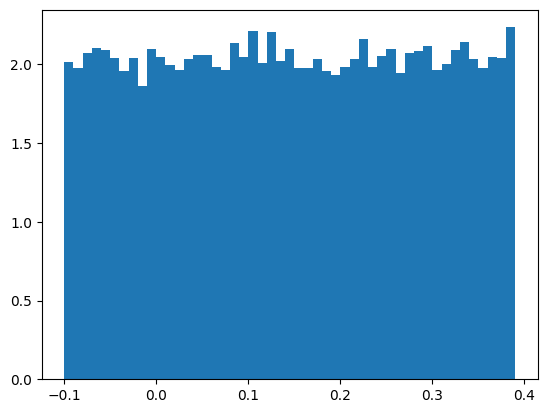

In [9]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

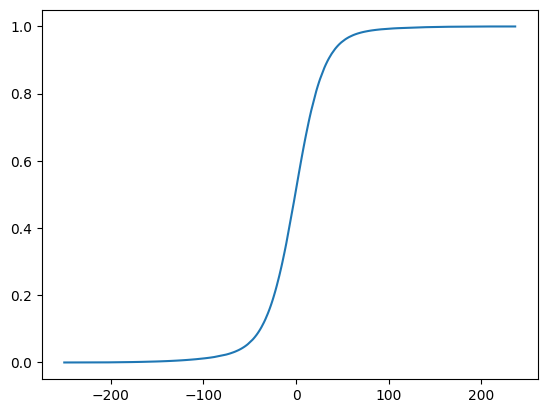

In [10]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [11]:
X2[int(N*0.59)]

4.7966876

In [12]:
len(ukb_emb)

21045

In [13]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [14]:
ukb_positive

dim200    0.991399
dim16     0.977524
dim211    0.965312
dim110    0.945260
dim157    0.933856
            ...   
dim136    0.017724
dim17     0.017439
dim95     0.014018
dim209    0.013732
dim85     0.000000
Length: 256, dtype: float64

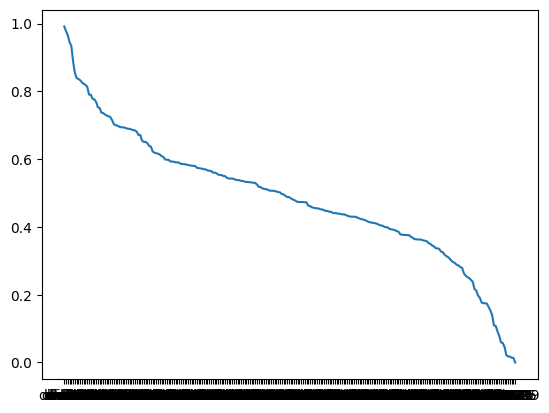

In [15]:
plt.plot(ukb_positive)

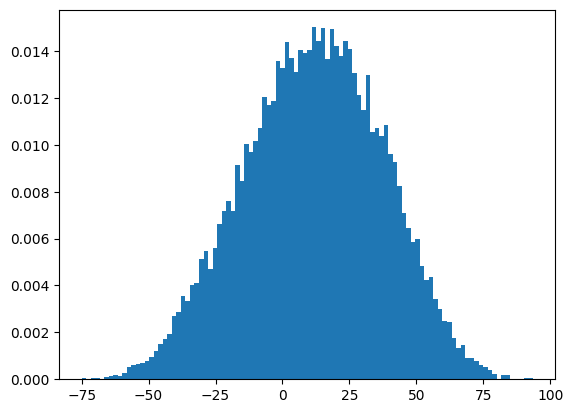

In [16]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

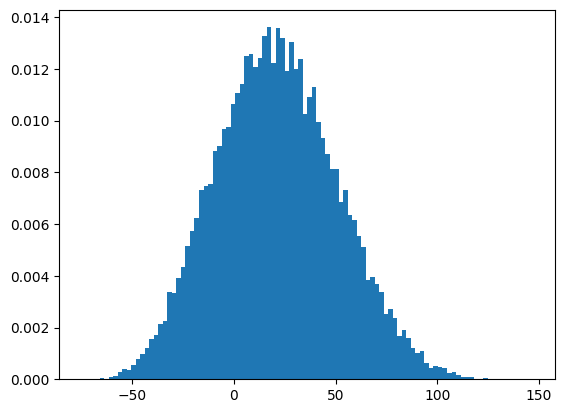

In [17]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

# UMAP

In [18]:
def compute_umap(df, n_neighbors=15, n_components=2):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [72]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

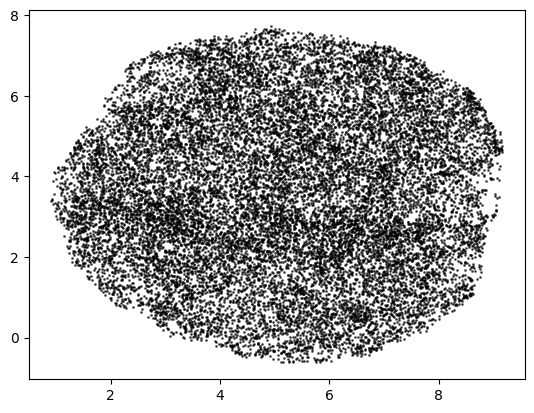

In [73]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [77]:
visual_ukb_emb_realigned = reducer.transform(ukb_emb_realigned)

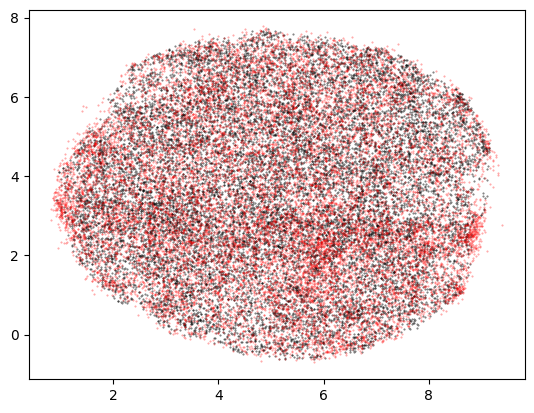

In [84]:
plt.scatter(visual_ukb_emb[:16071,0], visual_ukb_emb[:16071,1], c='black', s=0.2, alpha=0.6)
plt.scatter(visual_ukb_emb_realigned[:,0], visual_ukb_emb_realigned[:,1], c='red', s=0.2, alpha=0.4)

In [89]:
visual_df = pd.DataFrame(data=visual_ukb_emb[:16071,:], columns=["vis0", "vis1"])
visual_df_realigned = pd.DataFrame(data=visual_ukb_emb_realigned, columns=["vis0", "vis1"])

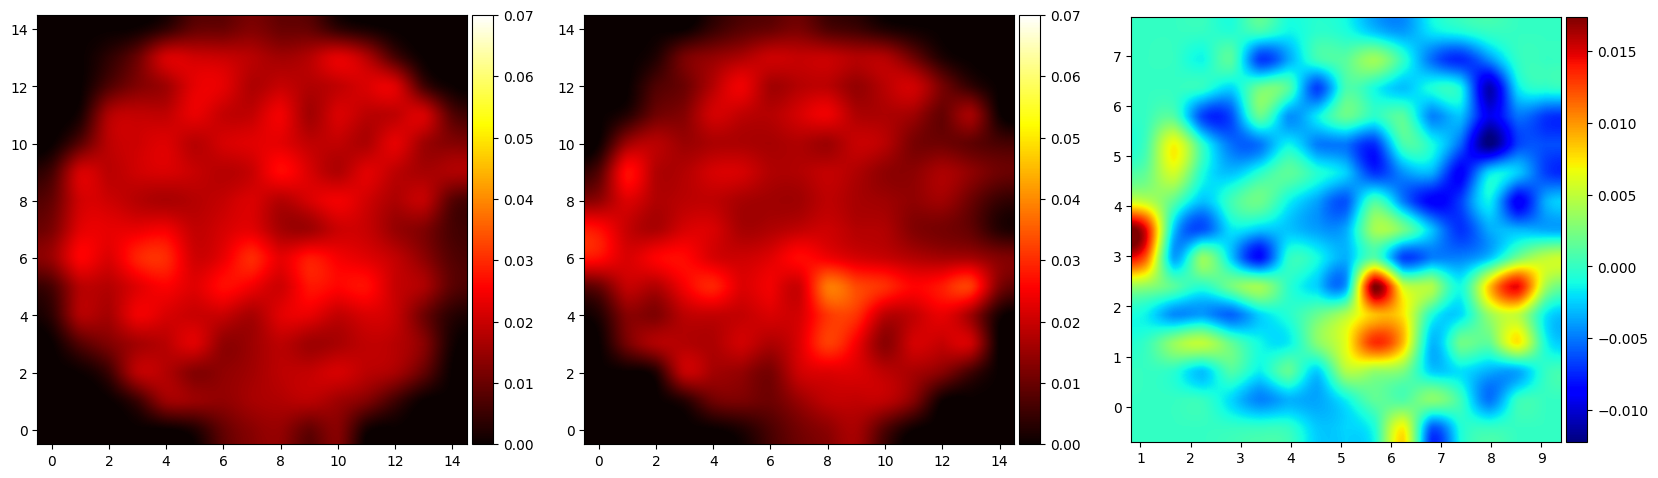

In [101]:
fig, ax = plt.subplots(figsize=[20,10], ncols=3)

females = visual_df
males = visual_df_realigned
bins=15
interpolation='spline16'

# Plots heatmap of females
Z, xedges, yedges = np.histogram2d(females["vis0"], females["vis1"], bins=bins, density=True)
# Zf = Z/np.unique(Z)[-1]
Zf = Z
im = ax[0].imshow(Zf.T,
          origin='lower',
          cmap='hot', 
          interpolation=interpolation,
          vmax=0.07
          )
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar   = plt.colorbar(im, cax=cax)

# Plots heatmap of males
Z, xedges, yedges = np.histogram2d(males["vis0"], males["vis1"], bins=bins, density=True)
# Zm = Z/np.unique(Z)[-1]
Zm = Z
im = ax[1].imshow(Zm.T,
          origin='lower',
          cmap='hot', 
          interpolation=interpolation,
          vmax=0.07
          )
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar   = plt.colorbar(im, cax=cax)

# Plots heatmap of difference
Z = Zm-Zf
im = ax[2].imshow(Z.T,
          origin='lower',
          cmap='jet', 
          interpolation=interpolation,
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]
          )

divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar   = fig.colorbar(im, cax=cax)

In [20]:
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-44.764812,-7.561168,-27.046082,-33.584930,-13.237930,-10.817898,0.581217,28.097376,6.987557,-17.722223,...,-19.355621,22.879978,60.176323,34.403290,-50.994858,-61.453964,67.128075,-30.144411,-11.567401,-34.812770
sub-1000458,18.033236,-19.331535,4.588765,17.981405,20.067762,15.785610,-20.103287,27.118490,18.161518,15.049867,...,9.665567,13.187021,49.730540,-5.843871,34.320240,31.848700,25.309462,5.590658,1.110065,8.127332
sub-1000575,-9.152472,7.461522,-34.986843,56.177795,18.481247,28.050117,-22.019306,-20.583708,5.513316,20.022285,...,-5.060265,10.865500,38.559406,-16.595951,6.662376,-35.713223,20.241130,2.440343,-9.916403,5.771592
sub-1000606,-26.186844,-38.599330,-14.307706,35.718296,-26.845760,3.516212,24.741770,3.041305,-18.980959,4.707555,...,20.363668,19.099170,34.822926,-0.493881,-13.821614,21.030193,2.300773,-7.729381,-1.205893,23.747902
sub-1000963,-23.809263,-25.897652,5.828577,20.800860,2.034690,51.072227,6.297543,-33.402027,20.131933,-5.758612,...,2.499297,-20.839810,-1.513577,-3.883939,18.674840,20.531118,18.756912,-2.353150,5.136505,-8.554947


In [21]:
reduced_ukb_emb, reducer_red = compute_umap(ukb_emb, n_neighbors=15, n_components=20)

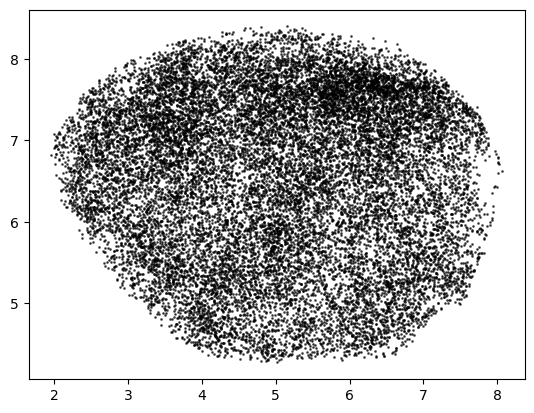

In [22]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [23]:
reduced_ukb_emb.shape

(21045, 20)

In [24]:
umap_ukb = visual_ukb_emb

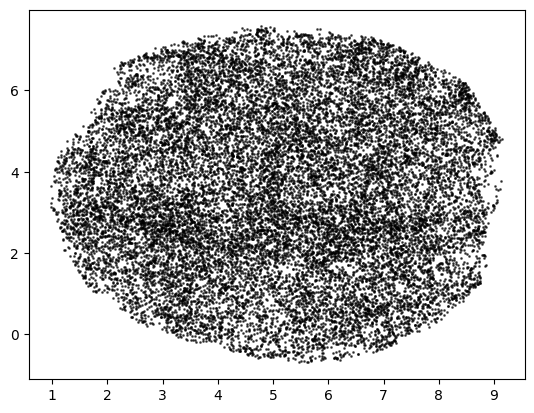

In [25]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

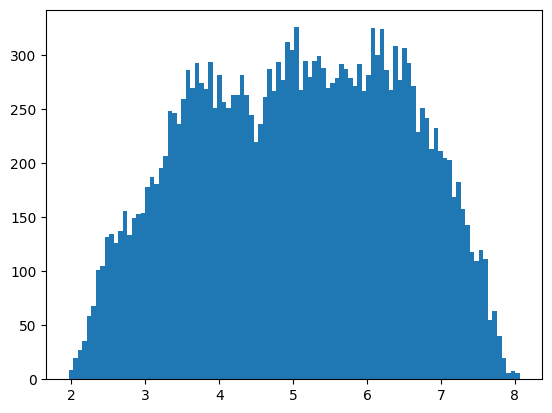

In [26]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

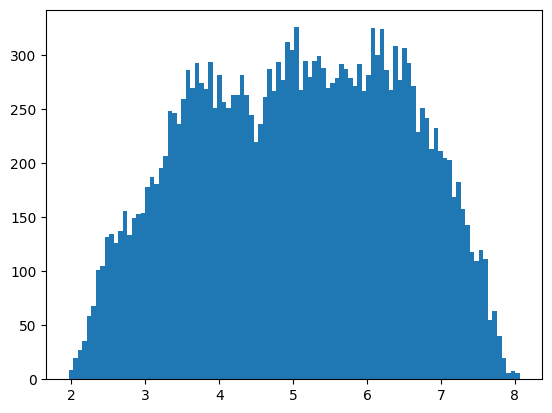

In [27]:
h = plt.hist(reduced_ukb_emb[:,0], bins=100)

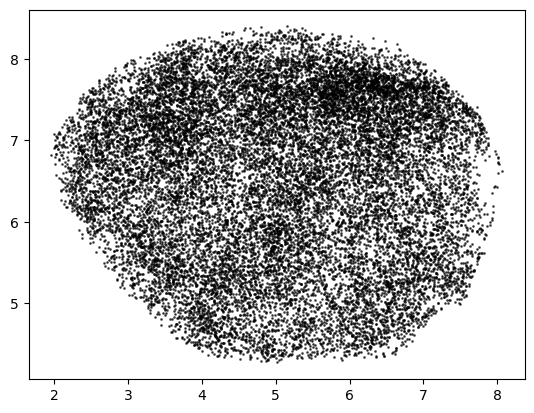

In [69]:
plt.scatter(reduced_ukb_emb[:,0], reduced_ukb_emb[:,1], c='black', s=1, alpha=0.6)

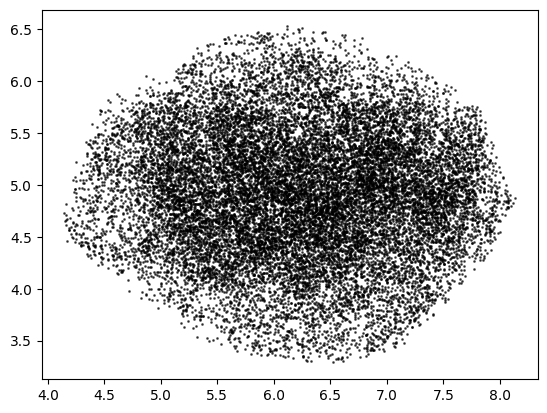

In [70]:
plt.scatter(reduced_ukb_emb[:,2], reduced_ukb_emb[:,3], c='black', s=1, alpha=0.6)

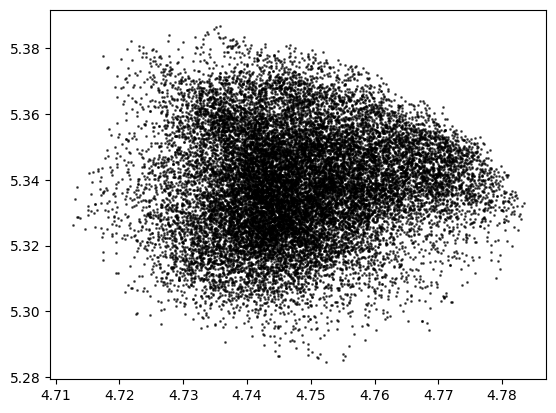

In [28]:
plt.scatter(reduced_ukb_emb[:,14], reduced_ukb_emb[:,15], c='black', s=1, alpha=0.6)

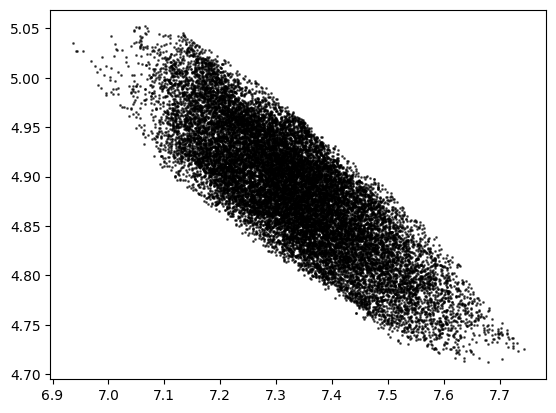

In [29]:
plt.scatter(reduced_ukb_emb[:,4], reduced_ukb_emb[:,5], c='black', s=1, alpha=0.6)

# UKB latent space analysis

In [30]:
global_id = skdim.id.MOM().fit(ukb_emb, n_neighbors=5000)

In [31]:
global_id.dimension_

6.431514310110662

In [32]:
umap_id = skdim.id.MOM().fit(reduced_ukb_emb, n_neighbors=1000)
umap_id.dimension_

3.707177539630862

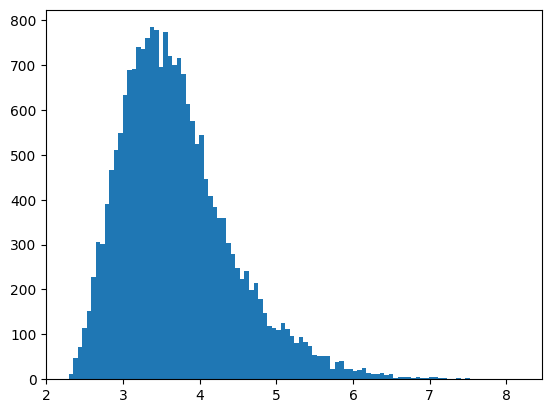

In [33]:
h = plt.hist(umap_id.dimension_pw_, bins=100)

In [34]:
# lid_mom = skdim.id.lPCA().fit_pw(ukb_emb, n_neighbors=50, n_jobs=1)

In [35]:
# lid_mom.dimension_

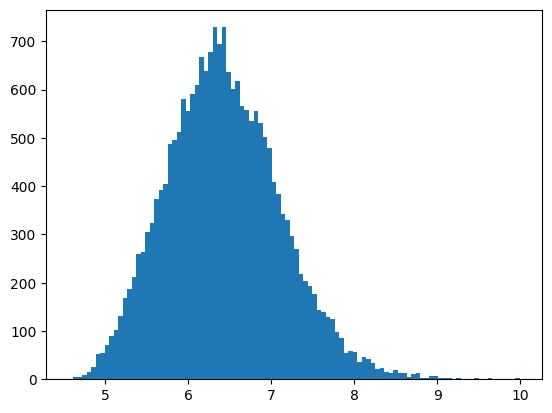

In [36]:

h = plt.hist(global_id.dimension_pw_, bins=100)

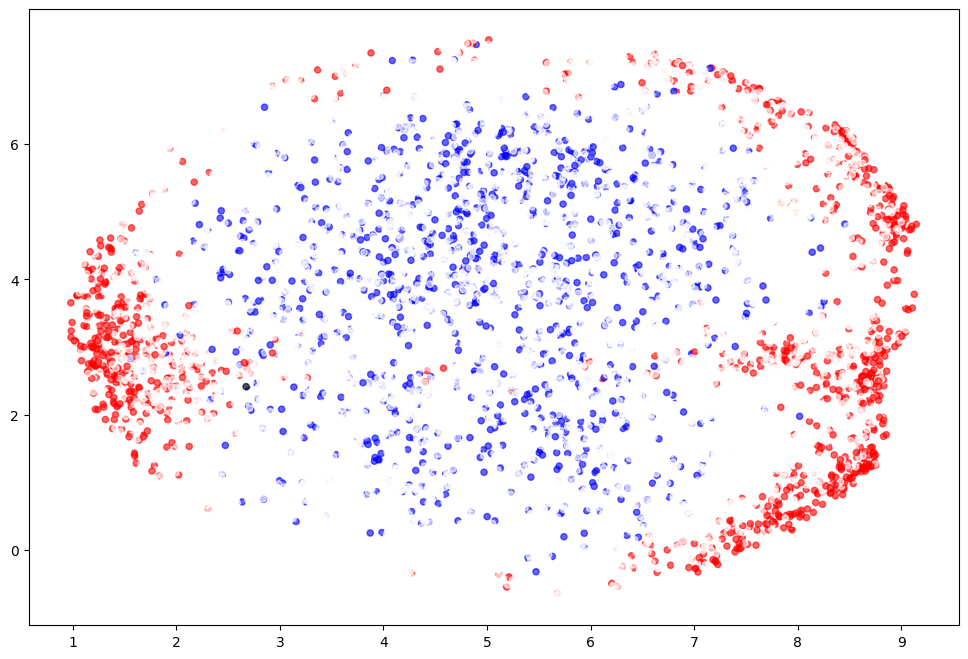

In [37]:
plt.figure(figsize=(12,8))
q_min = np.min(global_id.dimension_pw_)
q_05 = np.quantile(global_id.dimension_pw_, 0.05) 
q_95 = np.quantile(global_id.dimension_pw_, 0.95)
q_max = np.max(global_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=global_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

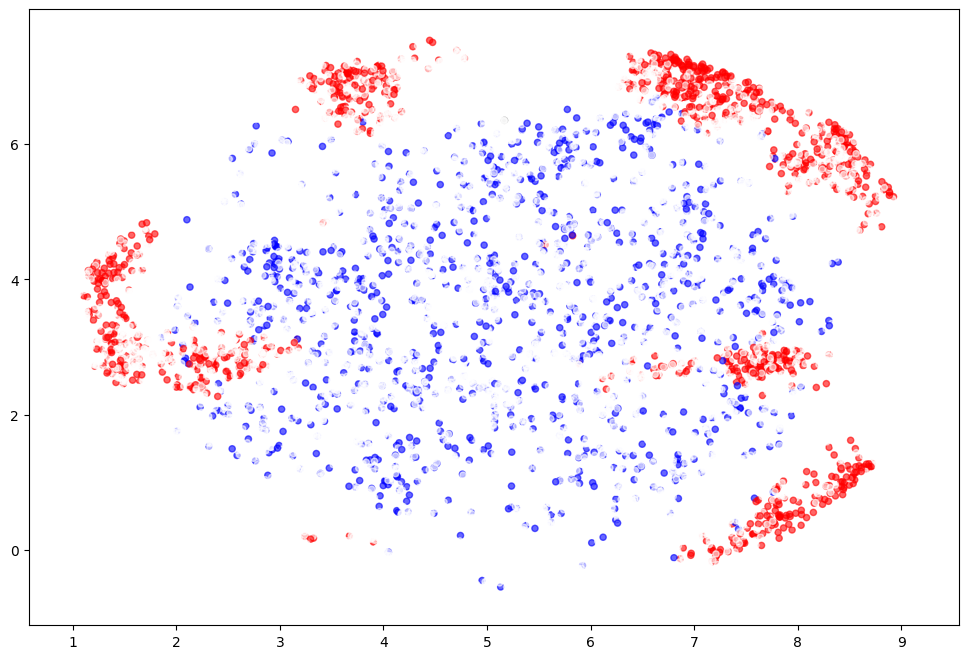

In [38]:
plt.figure(figsize=(12,8))
q_min = np.min(umap_id.dimension_pw_)
q_05 = np.quantile(umap_id.dimension_pw_, 0.05) 
q_95 = np.quantile(umap_id.dimension_pw_, 0.95)
q_max = np.max(umap_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, q_05, q_95, q_max], ['red', 'white', 'blue'])
alpha = []
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=20, c=umap_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

In [39]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='brute').fit(ukb_emb)
distances, indices = nbrs.kneighbors(ukb_emb)

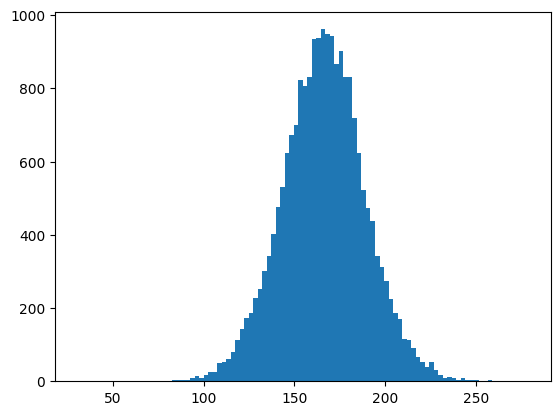

In [40]:
h = plt.hist(distances[:,1], bins=100)

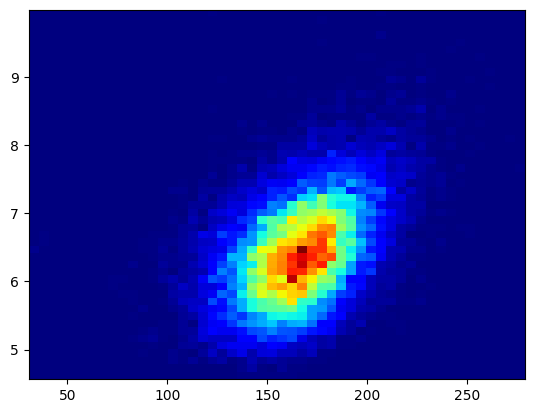

In [41]:
heatmap, xedges, yedges = np.histogram2d(distances[:,1], global_id.dimension_pw_, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

# UMAP of only lower dimensions

In [42]:
ukb_red = ukb_emb.copy(deep=True)
ukb_red.insert(0, "id", global_id.dimension_pw_)

In [43]:
ukb_red.insert(1, "umap_0", umap_ukb[:,0])
ukb_red.insert(2, "umap_1", umap_ukb[:,1])
ukb_red.insert(3, "distance", distances[:,1])
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,6.690468,4.784377,7.310390,201.674884,-44.764812,-7.561168,-27.046082,-33.584930,-13.237930,-10.817898,...,-19.355621,22.879978,60.176323,34.403290,-50.994858,-61.453964,67.128075,-30.144411,-11.567401,-34.812770
sub-1000458,6.836971,4.252955,4.343269,167.557124,18.033236,-19.331535,4.588765,17.981405,20.067762,15.785610,...,9.665567,13.187021,49.730540,-5.843871,34.320240,31.848700,25.309462,5.590658,1.110065,8.127332
sub-1000575,6.875539,3.176873,1.006664,189.158364,-9.152472,7.461522,-34.986843,56.177795,18.481247,28.050117,...,-5.060265,10.865500,38.559406,-16.595951,6.662376,-35.713223,20.241130,2.440343,-9.916403,5.771592
sub-1000606,6.360537,3.759595,2.951855,149.867024,-26.186844,-38.599330,-14.307706,35.718296,-26.845760,3.516212,...,20.363668,19.099170,34.822926,-0.493881,-13.821614,21.030193,2.300773,-7.729381,-1.205893,23.747902
sub-1000963,6.172695,6.517534,2.510330,180.151933,-23.809263,-25.897652,5.828577,20.800860,2.034690,51.072227,...,2.499297,-20.839810,-1.513577,-3.883939,18.674840,20.531118,18.756912,-2.353150,5.136505,-8.554947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,7.619404,3.802622,2.472868,193.510152,-41.317240,-40.447784,-30.041615,-16.751925,-3.510754,32.433940,...,7.294170,17.858904,14.641837,39.841465,-11.705192,-31.066736,-3.142765,0.310284,-3.552202,-20.834000
sub-6023808,6.920902,6.870112,5.822595,156.535851,-2.692974,-25.719662,-1.916609,10.499981,39.105064,20.467455,...,-16.505777,17.831127,30.909016,0.408267,24.229828,-49.831936,66.218410,-0.754347,-19.414412,-29.457642
sub-6023847,5.951935,7.729541,5.803815,143.137054,-48.122066,-44.838470,29.136040,-12.767525,7.187038,-4.979211,...,-17.365868,4.597022,-9.218680,1.169816,-12.880522,-35.096134,71.191170,-12.772809,-17.953390,-10.624347


In [44]:
ukb_red = ukb_red[ukb_red.id < np.quantile(global_id.dimension_pw_, 0.05) ]
# ukb_red = ukb_red[ukb_red.umap_0 > 6]

In [45]:
ukb_red.head()

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1002584,5.215224,7.748831,6.613979,129.976619,-32.457670,-47.219276,22.182806,-44.524810,15.641485,-15.536216,...,-24.373888,21.986937,26.387598,18.404383,-23.449612,-49.629635,95.202850,-14.840814,-8.564486,-35.354347
sub-1004594,4.868877,1.815881,3.025983,141.259812,-19.349870,-13.238904,-0.408026,32.558437,-16.956593,-8.936925,...,8.828918,5.520784,77.160950,29.249857,-23.574090,38.749348,-17.564440,2.129007,21.693592,35.932873
sub-1016339,5.336542,7.059515,-0.178199,150.539126,-51.121487,8.719762,0.470244,14.250670,9.734706,58.886326,...,-14.335282,-41.895485,13.837105,36.265614,-31.726720,-64.020485,32.189636,34.503357,10.801600,-19.380157
sub-1016414,5.212254,8.793853,2.902764,121.425249,-22.037521,-33.581097,22.438354,-12.820152,37.268982,53.072170,...,2.364352,-17.240412,-4.162751,-3.623873,-34.530230,-44.438347,75.436340,26.207932,10.019740,-18.553116
sub-1022714,5.351621,8.214577,1.472748,173.158287,-40.072870,-51.729640,27.417894,5.642014,0.104245,49.306484,...,3.645973,-17.489597,-31.066880,35.461426,-21.189901,4.347689,32.162014,32.806020,3.734883,-5.512300


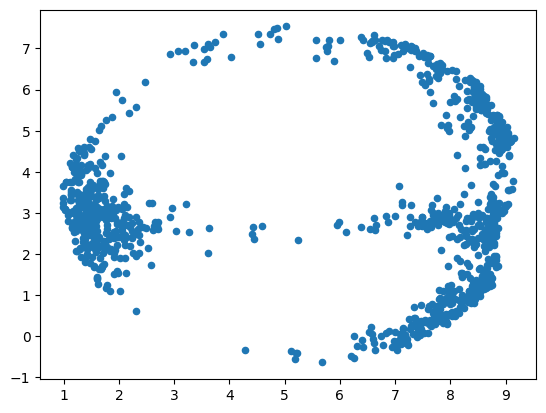

In [46]:
plt.scatter(ukb_red.umap_0, ukb_red.umap_1, s=20)

In [47]:
ukb_umap_red, reducer_red = compute_umap(ukb_red[4:], n_neighbors=15)

In [48]:
red_id = skdim.id.MOM().fit(ukb_red[4:], n_neighbors=500)
red_id.dimension_

2.513084152270255

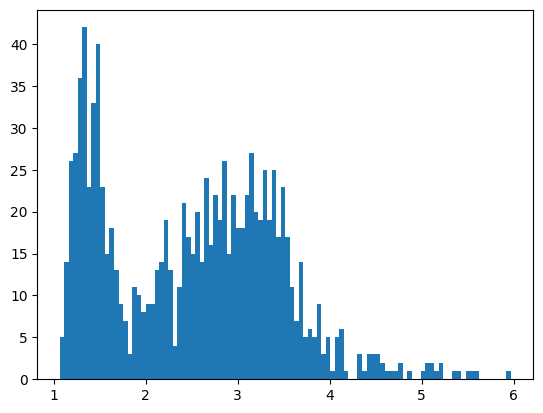

In [49]:
h = plt.hist(red_id.dimension_pw_, bins=100)

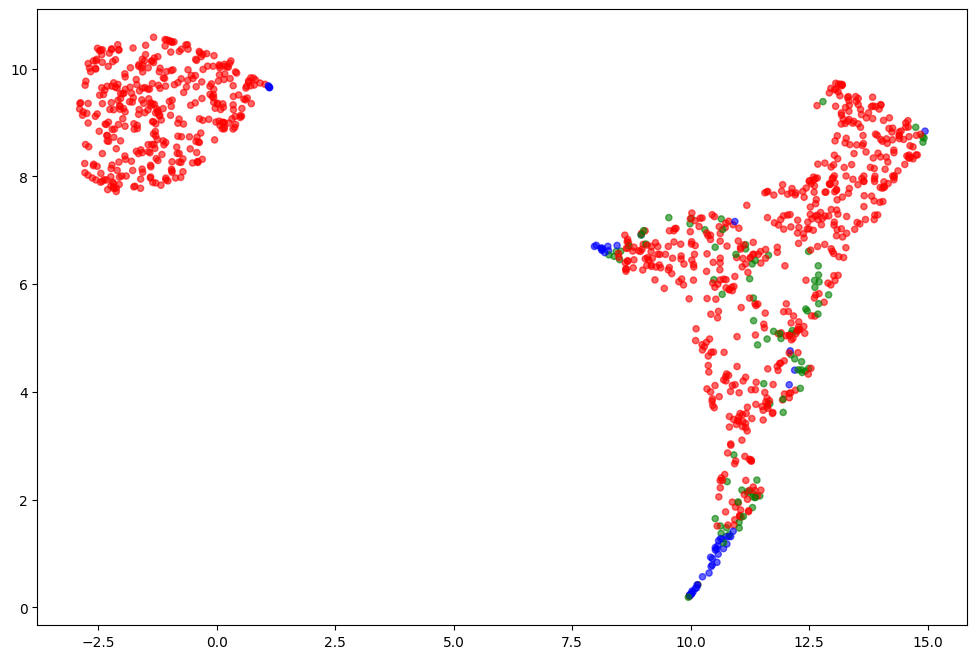

In [50]:
plt.figure(figsize=(12,8))
q_min = np.min(red_id.dimension_pw_)
q_05 = np.quantile(red_id.dimension_pw_, 0.05) 
q_95 = np.quantile(red_id.dimension_pw_, 0.95)
q_max = np.max(red_id.dimension_pw_)
cmap, norm = mcolors.from_levels_and_colors([q_min, 3.5, q_95, q_max], ['red', 'green', 'blue'])
alpha = []
plt.scatter(ukb_umap_red[:,0], ukb_umap_red[:,1], s=20, c=red_id.dimension_pw_, alpha=0.6, cmap=cmap, norm=norm)
plt.show()

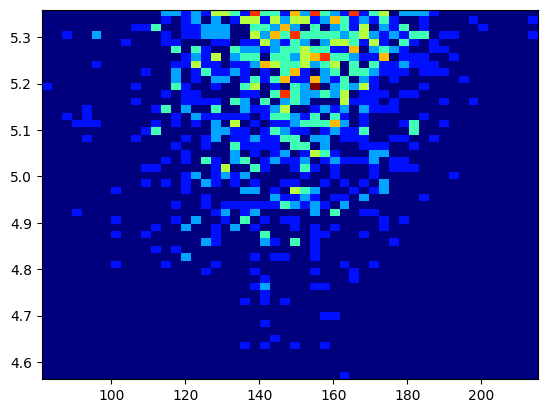

In [51]:
heatmap, xedges, yedges = np.histogram2d(ukb_red.distance, ukb_red.id, bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [52]:
ukb_red

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1002584,5.215224,7.748831,6.613979,129.976619,-32.457670,-47.219276,22.182806,-44.524810,15.641485,-15.536216,...,-24.373888,21.986937,26.387598,18.404383,-23.449612,-49.629635,95.202850,-14.840814,-8.564486,-35.354347
sub-1004594,4.868877,1.815881,3.025983,141.259812,-19.349870,-13.238904,-0.408026,32.558437,-16.956593,-8.936925,...,8.828918,5.520784,77.160950,29.249857,-23.574090,38.749348,-17.564440,2.129007,21.693592,35.932873
sub-1016339,5.336542,7.059515,-0.178199,150.539126,-51.121487,8.719762,0.470244,14.250670,9.734706,58.886326,...,-14.335282,-41.895485,13.837105,36.265614,-31.726720,-64.020485,32.189636,34.503357,10.801600,-19.380157
sub-1016414,5.212254,8.793853,2.902764,121.425249,-22.037521,-33.581097,22.438354,-12.820152,37.268982,53.072170,...,2.364352,-17.240412,-4.162751,-3.623873,-34.530230,-44.438347,75.436340,26.207932,10.019740,-18.553116
sub-1022714,5.351621,8.214577,1.472748,173.158287,-40.072870,-51.729640,27.417894,5.642014,0.104245,49.306484,...,3.645973,-17.489597,-31.066880,35.461426,-21.189901,4.347689,32.162014,32.806020,3.734883,-5.512300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6011584,5.289161,8.781287,2.500270,148.193181,-14.628613,-86.424940,20.977253,17.980825,2.064832,33.725113,...,19.385023,9.070948,-25.659403,6.615550,-40.745790,-9.540682,65.236610,19.489710,10.867307,14.690405
sub-6013700,4.932713,7.893842,0.887842,152.059842,-38.119770,-23.716660,16.697628,35.651108,12.018917,37.997177,...,-0.895256,-29.939340,-4.225236,0.000306,-20.296333,-56.300034,49.156870,29.696774,1.464953,8.483921
sub-6019097,5.079191,1.461421,3.383292,176.722048,-16.358530,29.397327,9.992284,54.738010,-10.008370,4.172127,...,-11.764904,-18.339020,79.993416,21.825413,7.313157,1.027133,-7.468558,2.364551,29.379702,29.468607


In [53]:
ukb_red2 = ukb_red[ukb_red.umap_0 > 6]
ukb_red2

,id,umap_0,umap_1,distance,dim1,dim2,dim3,dim4,dim5,dim6,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1002584,5.215224,7.748831,6.613979,129.976619,-32.457670,-47.219276,22.182806,-44.524810,15.641485,-15.536216,...,-24.373888,21.986937,26.387598,18.404383,-23.449612,-49.629635,95.202850,-14.840814,-8.564486,-35.354347
sub-1016339,5.336542,7.059515,-0.178199,150.539126,-51.121487,8.719762,0.470244,14.250670,9.734706,58.886326,...,-14.335282,-41.895485,13.837105,36.265614,-31.726720,-64.020485,32.189636,34.503357,10.801600,-19.380157
sub-1016414,5.212254,8.793853,2.902764,121.425249,-22.037521,-33.581097,22.438354,-12.820152,37.268982,53.072170,...,2.364352,-17.240412,-4.162751,-3.623873,-34.530230,-44.438347,75.436340,26.207932,10.019740,-18.553116
sub-1022714,5.351621,8.214577,1.472748,173.158287,-40.072870,-51.729640,27.417894,5.642014,0.104245,49.306484,...,3.645973,-17.489597,-31.066880,35.461426,-21.189901,4.347689,32.162014,32.806020,3.734883,-5.512300
sub-1024948,5.122850,6.643101,-0.326379,129.907677,-40.529040,-8.938532,14.317228,11.407700,4.579750,45.245220,...,-0.151523,-49.522156,18.085829,35.306038,-14.744554,-61.510746,24.754898,34.285360,10.315162,-5.789090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6010977,5.334279,8.965899,3.981198,157.629054,-31.788948,-27.730247,16.284689,25.423220,9.057899,24.807453,...,0.082211,-26.615873,3.208875,-2.802445,-54.926346,-83.701840,71.551155,29.974836,22.882736,7.009341
sub-6011584,5.289161,8.781287,2.500270,148.193181,-14.628613,-86.424940,20.977253,17.980825,2.064832,33.725113,...,19.385023,9.070948,-25.659403,6.615550,-40.745790,-9.540682,65.236610,19.489710,10.867307,14.690405
sub-6013700,4.932713,7.893842,0.887842,152.059842,-38.119770,-23.716660,16.697628,35.651108,12.018917,37.997177,...,-0.895256,-29.939340,-4.225236,0.000306,-20.296333,-56.300034,49.156870,29.696774,1.464953,8.483921


In [54]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_emb)
explained_all = my_model.explained_variance_ratio_.cumsum()

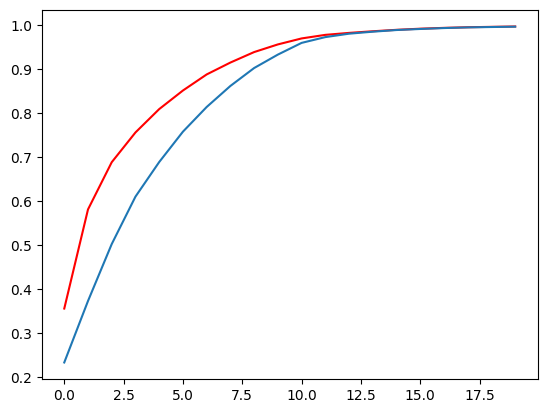

In [55]:
my_model = PCA(n_components=20)
my_model.fit_transform(ukb_red2[4:])
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)

In [56]:
reduced_ukb_emb.shape

(21045, 20)

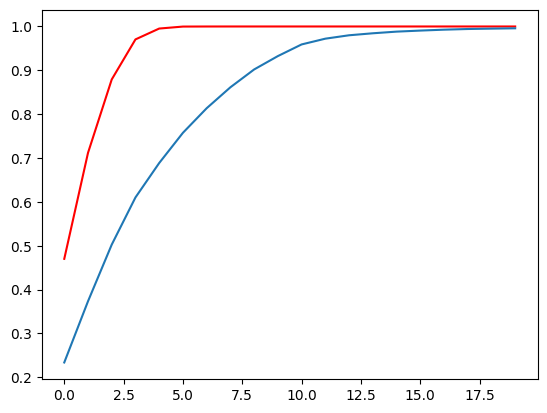

In [57]:
my_model = PCA(n_components=20)
on_axes = my_model.fit_transform(reduced_ukb_emb)
explained = my_model.explained_variance_ratio_.cumsum()
plt.plot(explained, 'r')
plt.plot(explained_all)

In [58]:
explained

array([0.47001132, 0.71168166, 0.8791686 , 0.9705199 , 0.9952748 ,
       0.9997814 , 0.9999491 , 0.99998856, 0.999993  , 0.9999958 ,
       0.9999975 , 0.9999989 , 0.99999976, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],
      dtype=float32)

In [59]:
on_axes.shape

(21045, 20)

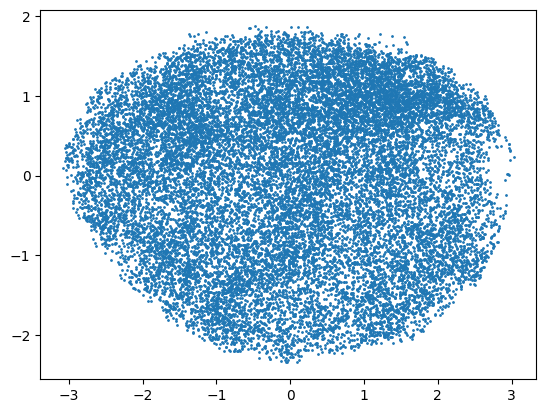

In [60]:
plt.scatter(on_axes[:,0], on_axes[:,1], s=1)

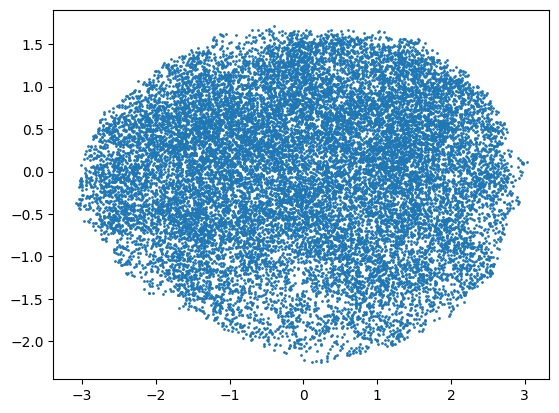

In [61]:
plt.scatter(on_axes[:,0], on_axes[:,2], s=1)

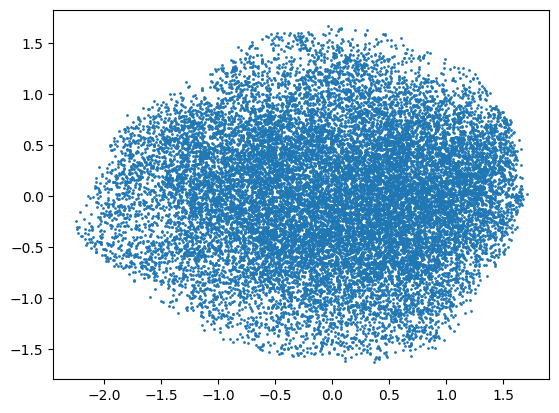

In [62]:
plt.scatter(on_axes[:,2], on_axes[:,3], s=1)

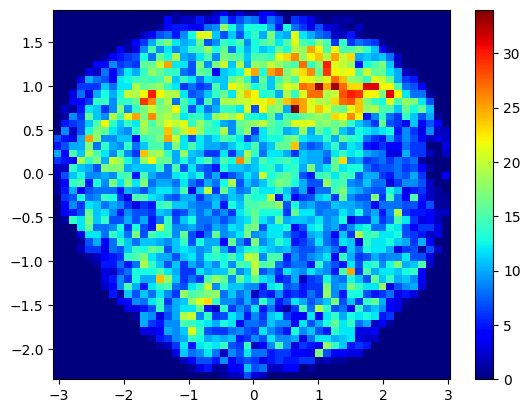

In [63]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,1], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()

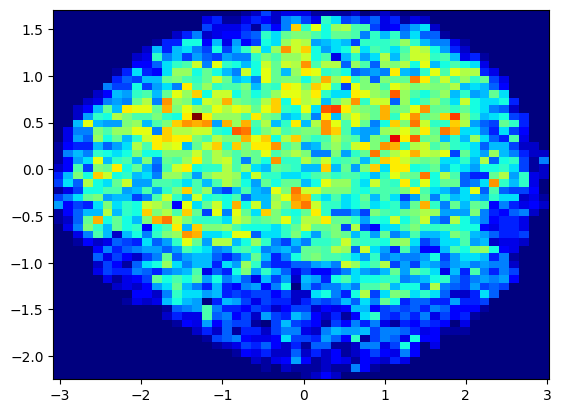

In [64]:
heatmap, xedges, yedges = np.histogram2d(on_axes[:,0], on_axes[:,2], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.show()

In [65]:
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

X = ukb_emb
umap_embedding = reduced_ukb_emb

#MNIST variation explained by UMAP1
UMAP_matrix = pd.DataFrame(umap_embedding)
pls = PLSRegression(n_components = 1)
pls.fit(UMAP_matrix, X)
y_pred = pls.predict(UMAP_matrix)
print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
#0.07335034485651613

#Here the same but more explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07335034485652026


#Here the same but explicitly via the R^2 equation above
print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
np.mean(X, axis = 0))**2))
#0.07265918428991347

0.10957913848040499
dim1     -350.103337
dim2     -173.029742
dim3     -401.039044
dim4     -219.547355
dim5     -299.342479
             ...    
dim252    -91.798490
dim253   -170.245746
dim254   -643.040884
dim255   -912.315418
dim256   -354.811165
Length: 256, dtype: float64
dim1     -350.103337
dim2     -173.029742
dim3     -401.039044
dim4     -219.547355
dim5     -299.342479
             ...    
dim252    -91.798490
dim253   -170.245746
dim254   -643.040884
dim255   -912.315418
dim256   -354.811165
Length: 256, dtype: float64


In [66]:
X = reduced_ukb_emb

explainable = np.zeros((X.shape[1],1))
for i in range(X.shape[1]):
    umap_embedding = reduced_ukb_emb[:,i]

    #MNIST variation explained by UMAP1
    UMAP_matrix = pd.DataFrame(umap_embedding)
    pls = PLSRegression(n_components = 1)
    pls.fit(UMAP_matrix, X)
    y_pred = pls.predict(UMAP_matrix)
    print(r2_score(X, y_pred, multioutput = 'variance_weighted'))
    #0.07335034485651613

    #Here the same but more explicitly via the R^2 equation above
    # print(1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    # np.mean(X, axis = 0))**2))
    #0.07335034485652026


    #Here the same but explicitly via the R^2 equation above
    explainable[i] = 1 - np.sum((np.array(X) - np.array(y_pred))**2) / np.sum((X - \
    np.mean(X, axis = 0))**2)
    #0.07265918428991347

0.4696989908206789
0.24087134050363518
0.17187626935587116
0.09151161732368138
0.05236385692563456
0.1186286998037626
0.07595246054807814
0.07731468814423043
0.03605018006223133
0.11701460120550917
0.06228506707360936
0.13318403008720858
0.10499775619413933
0.12140643340226161
0.12179067970450519
0.08206764055288003
0.2584440619483297
0.060101574501117146
0.10724507938069933
0.17113304854398867


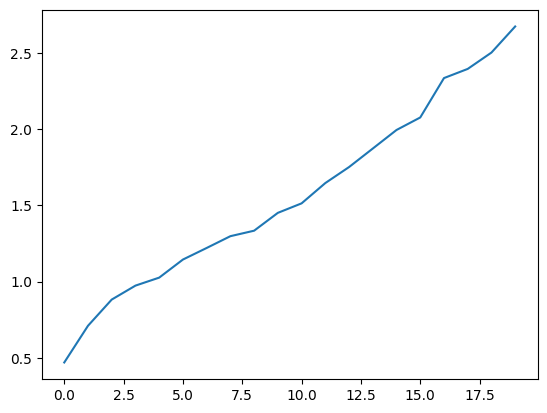

In [67]:
plt.plot(explainable.cumsum())